# Factor Graphs


### Preliminaries

- Goal 
  - Introduction to Forney-style factor graphs and message passing algorithms
- Materials        
  - Mandatory
    - These lecture notes   
    - [Loeliger, 2007](./files/Loeliger-2007-The-factor-graph-approach-to-model-based-signal-processing.pdf), pp. 1295-1300 (until section IV)
  - Optional
    - [Video lecture](https://www.youtube.com/watch?v=Fv2YbVg9Frc&t=31) by Frederico Wadehn (ETH Zurich) (**highly recommended**)
      


### Why Factor Graphs?

- A probabilistic inference task gets its computational load mainly through the need for marginalization (i.e., computing integrals). E.g., for a generative model $p(x_1,x_2,x_3,x_4,x_5)$, the inference task $p(x_2|x_3)$ is given by 

$$\begin{align*}
p(x_2|x_3) = \frac{\int p(x_1,x_2,x_3,x_4,x_5) \, \mathrm{d}x_1  \mathrm{d}x_4 \mathrm{d}x_5}{\int p(x_1,x_2,x_3,x_4,x_5) \, \mathrm{d}x_1  \mathrm{d}x_2 \mathrm{d}x_4 \mathrm{d}x_5}
\end{align*}$$

- Since these computations suffer from the "curse of dimensionality", we often need to solve a simpler problem in order to get an answer. 

- Factor graphs provide an computationally efficient approach to solving inference problems **if the generative distribution can be factorized**. 

- Factorization helps. For instance, if $p(x_1,x_2,x_3,x_4,x_5) = p(x_1)p(x_2,x_3)p(x_4)p(x_5|x_4)$, then
$$\begin{align*}
p(x_2|x_3) &= \frac{\int p(x_1)p(x_2,x_3)p(x_4)p(x_5|x_4) \, \mathrm{d}x_1  \mathrm{d}x_4 \mathrm{d}x_5}{\int p(x_1)p(x_2,x_3)p(x_4)p(x_5|x_4) \, \mathrm{d}x_1  \mathrm{d}x_2 \mathrm{d}x_4 \mathrm{d}x_5} 
  = \frac{p(x_2,x_3)}{\int p(x_2,x_3) \mathrm{d}x_2}
\end{align*}$$
which is computationally much cheaper than the general case above.

- In this lesson, we discuss how computationally efficient inference in factorized probability distributions can be automated.

###  Factor Graph Construction Rules

- Consider a function 
$$
f(x_1,x_2,x_3,x_4,x_5) = f_a(x_1,x_2,x_3) \cdot f_b(x_3,x_4,x_5) \cdot f_c(x_4)
$$

- The factorization of this function can be graphically represented by a **Forney-style Factor Graph** (FFG):

<img src="./figures/ffg-example-1.png" width="400px">

- An FFG is an **undirected** graph subject to the following construction rules ([Forney, 2001](http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=910573&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F18%2F19638%2F00910573.pdf%3Farnumber%3D910573))

  1. A **node** for every factor;
  1. An **edge** (or **half-edge**) for every variable;
  1. Node $g$ is connected to edge $x$ **iff** variable $x$ appears in factor $g$.

### Some FFG Terminology

- $f$ is called the **global function** and $f_\bullet$ are the **factors**. 

- A **configuration** is an assigment of values to all variables.

- The **configuration space** is the set of all configurations, i.e., the domain of $f$

- A configuration $\omega=(x_1,x_2,x_3,x_4,x_5)$ is said to be **valid** iff $f(\omega) \neq 0$
  

###  Equality Nodes for Branching Points


- Note that a variable can appear in maximally two factors in an FFG (since an edge has only two end points).

- Consider the factorization (where $x_2$ appears in three factors) 

$$
 f(x_1,x_2,x_3,x_4) = f_a(x_1,x_2)\cdot f_b(x_2,x_3) \cdot f_c(x_2,x_4)
$$

- For the factor graph representation, we will instead consider the function $g$, defined as
$$\begin{align*}
 g(x_1,x_2&,x_2^\prime,x_2^{\prime\prime},x_3,x_4) 
  = f_a(x_1,x_2)\cdot f_b(x_2^\prime,x_3) \cdot f_c(x_2^{\prime\prime},x_4) \cdot f_=(x_2,x_2^\prime,x_2^{\prime\prime})
\end{align*}$$
  where 
$$
f_=(x_2,x_2^\prime,x_2^{\prime\prime}) \triangleq \delta(x_2-x_2^\prime)\, \delta(x_2-x_2^{\prime\prime})
$$

 <img src="./figures/ffg-wEquality-node.png" width="400px">
  

###  Equality Nodes for Branching Points, cont'd

- Note that through introduction of auxiliary variables $X_2^\prime$ and $X_2^{\prime\prime}$ each variable in $g$ appears in maximally two factors. 

- The constraint $f_=(x,x^\prime,x^{\prime\prime})$ enforces that $X=X^\prime=X^{\prime\prime}$ **for every valid configuration**.

- Since $f$ is a marginal of $g$, i.e., 
$$
f(x_1,x_2,x_3,x_4) = \int g(x_1,x_2,x_2^\prime,x_2^{\prime\prime},x_3,x_4)\, \mathrm{d}x_2^\prime \mathrm{d}x_2^{\prime\prime}
$$
it follows that any inference problem on $f$ can be executed by a corresponding inference problem on $g$, e.g.,
$$\begin{align*}
f(x_1 \mid x_2) &\triangleq \frac{\int f(x_1,x_2,x_3,x_4) \,\mathrm{d}x_3 \mathrm{d}x_4 }{ \int f(x_1,x_2,x_3,x_4) \,\mathrm{d}x_1 \mathrm{d}x_3 \mathrm{d}x_4} \\
  &= \frac{\int g(x_1,x_2,x_2^\prime,x_2^{\prime\prime},x_3,x_4) \,\mathrm{d}x_2^\prime \mathrm{d}x_2^{\prime\prime} \mathrm{d}x_3 \mathrm{d}x_4 }{ \int g(x_1,x_2,x_2^\prime,x_2^{\prime\prime},x_3,x_4) \,\mathrm{d}x_1 \mathrm{d}x_2^\prime \mathrm{d}x_2^{\prime\prime} \mathrm{d}x_3 \mathrm{d}x_4} \\
  &\triangleq g(x_1 \mid x_2)
\end{align*}$$

- $\Rightarrow$ **Any factorization of a global function $f$ can be represented by a Forney-style Factor Graph**.

### Probabilistic Models as Factor Graphs

- FFGs can be used to express conditional independence (factorization) in probabilistic models. 

- For example, the (previously shown) graph for 
$f_a(x_1,x_2,x_3) \cdot f_b(x_3,x_4,x_5) \cdot f_c(x_4)$ 
could represent the probabilistic model
$$
p(x_1,x_2,x_3,x_4,x_5) = p(x_1,x_2|x_3) \cdot p(x_3,x_5|x_4) \cdot p(x_4)
$$
where we identify 
$$\begin{align*}
f_a(x_1,x_2,x_3) &= p(x_1,x_2|x_3) \\
f_b(x_3,x_4,x_5) &= p(x_3,x_5|x_4) \\
f_c(x_4) &= p(x_4)
\end{align*}$$

- This is the graph
<img src="./figures/ffg-example-prob-model.png" width="400px">

### Inference by Closing Boxes

- Factorizations provide opportunities to cut on the amount of needed computations when doing inference. In what follows, we will use FFGs to process these opportunities in an automatic way (i.e., by message passing). 

- Assume we wish to compute the marginal
$$
\bar{f}(x_3) = \sum_{x_1,x_2,x_4,x_5,x_6,x_7}f(x_1,x_2,\ldots,x_7)
$$
where $f$ is factorized as given by the following FFG

<img src="./figures/ffg-message-passing-1.png" width="500px">

- Due to the factorization, we can decompose this sum by the **distributive law** as
$$\begin{align*}
\bar{f}(x_3) = & \underbrace{ \left( \sum_{x_1,x_2} f_a(x_1)\,f_b(x_2)\,f_c(x_1,x_2,x_3)\right) }_{\overrightarrow{\mu}_{X_3}(x_3)}  \\
  & \underbrace{ \cdot\left( \sum_{x_4,x_5} f_d(x_4)\,f_e(x_3,x_4,x_5) \cdot \underbrace{ \left( \sum_{x_6,x_7} f_f(x_5,x_6,x_7)\,f_g(x_7)\right) }_{\overleftarrow{\mu}_{X_5}(x_5)} \right) }_{\overleftarrow{\mu}_{X_3}(x_3)}
\end{align*}$$
which is computationally (much) lighter than executing the full sum $\sum_{x_1,\ldots,x_7}f(x_1,x_2,\ldots,x_7)$

<img src="./figures/ffg-message-passing-2.png" width="600px">

- Messages may flow in both directions on any edge (here on $X_3$). We often draw _directed edges_ in a FFG in order to distinguish forward messages $\overrightarrow{\mu}_\bullet(\cdot)$ (in the same direction as the arrow of the edge) from backward messages $\overleftarrow{\mu}_\bullet(\cdot)$ (in opposite direction). With directed edges, the FFG looks as follows: 

<img src="./figures/ffg-message-passing-3.png" width="600px">

- Crucially, drawing arrows on edges is only meant as a notational convenience. Technically, an FFG is an undirected graph. 

- Note that $\overleftarrow{\mu}_{X_5}(x_5)$ is obtained by multiplying all enclosed factors ($f_f$, $f_g$) by the green dashed box, followed by marginalization over all enclosed variables ($x_6$, $x_7$). 

- This is the **Closing the Box**-rule, which is a general recipe for marginalization of hidden variables and leads to a new factor with outgoing (sum-product) message 
$$ \mu_{\text{SP}} = \sum_{ \stackrel{ \textrm{enclosed} }{ \textrm{variables} } } \;\prod_{\stackrel{ \textrm{enclosed} }{ \textrm{factors} }}
$$

### Evaluating the closing-the-box rule for individual nodes
  

- First, closing a box around the **terminal nodes** leads to $\overrightarrow{\mu}_{X_1}(x_1) \triangleq f_a(x_1)$, $\overrightarrow{\mu}_{X_2}(x_2) \triangleq f_b(x_2)$ etc. 
  - So, the message out of a terminal node is the factor itself.
  - <span class="exercise">(Exercise) Derive now that the message coming from the open end of a half-edge always equals $1$.</span> 

- The messages from **internal nodes** evaluate to:
$$\begin{align*}
\overrightarrow{\mu}_{X_3}(x_3) &= \sum_{x_1,x_2} f_a(x_1) \,f_b(x_2) \,f_c(x_1,x_2,x_3) \\
  &= \sum_{x_1,x_2} \overrightarrow{\mu}_{X_1}(x_1) \overrightarrow{\mu}_{X_2}(x_2) \,f_c(x_1,x_2,x_3) \\
\overleftarrow{\mu}_{X_5}(x_5) &= \sum_{x_6,x_7} f_f(x_5,x_6,x_7)\,f_g(x_7) \\
 &= \sum_{x_6,x_7} \overrightarrow{\mu}_{X_7}(x_7)\, f_f(x_5,x_6,x_7) \\
\end{align*}$$

- Crucially, all message update rules can be computed from information that is **locally available** at each node.

### Sum-Product Algorithm

- (**Sum-Product update rule**). This recursive pattern for computing messages applies generally and is called the **Sum-Product update rule**, which is really just a special case of the closing-the-box rule: For any node, the outgoing message is obtained by taking the product of all incoming messages and the node function, followed by summing out (marginalization) all incoming variables. What is left (the outgoing message) is a function of the outgoing variable only: 

$$ \boxed{
\overrightarrow{\mu}_{Y}(y) = \sum_{x_1,\ldots,x_n} \overrightarrow{\mu}_{X_1}(x_1)\cdots \overrightarrow{\mu}_{X_n}(x_n) \,f(y,x_1,\ldots,x_n) }
$$

<img src="./figures/ffg-sum-product.png" width="400px">

- (**Sum-Product Theorem**). If the factor graph for a function $f$ has **no cycles**, then the marginal $\bar{f}(x_3) = \sum_{x_1,x_2,x_4,x_5,x_6,x_7}f(x_1,x_2,\ldots,x_7)$ is given by the <span style="color:red">Sum-Product Theorem</span>:

$$ \boxed{
\bar{f}(x_3) = \overrightarrow{\mu}_{X_3}(x_3)\cdot \overleftarrow{\mu}_{X_3}(x_3)}
$$

- (**Sum-Product Algorithm**). If folows that the marginal $\bar{f}(x_3) = \sum_{x_1,x_2,x_4,x_5,x_6,x_7}f(x_1,x_2,\ldots,x_7)$ can be efficiently computed through sum-product messages. Executing inference through SP message passing is called the **Sum-Product Algorithm**.

- <span class="exercise">(Exercise) Verfiy for yourself that all maginals in a cycle-free graph (a tree) can be computed exactly by starting with messages at the terminals and working towards the root of the tree.</span>

### Processing Observations in a Factor Graph

 - Terminal nodes can be used describe **observed variables**, e.g., use a factor $$f_Y(y) = \delta(y-3)$$ to terminate the edge for variable $Y$ if $y=3$ is observed.
 

 
 ##### Example
 
 - Consider a generative model 
$$p(x,y_1,y_2) = p(x)\,p(y_1|x)\,p(y_2|x) .$$ 
  - This model expresses the assumption that $Y_1$ and $Y_2$ are independent measurements of $X$.

<img src="./figures/ffg-observations.png" width="300px">

 
- Assume that we are interested in the posterior for $X$ after observing $Y_1= \hat y_1$ and $Y_2= \hat y_2$. The posterior for $X$ can be inferred by applying the sum-product algorithm to the following graph:

<img src="./figures/ffg-observations-2.png" width="450px">

 - (Note that) we usually draw terminal nodes for observed variables in the graph by smaller solid-black squares. This is just to help the visualization of the graph, since the computational rules are no different than for other nodes. 

- <span class="exercise">(Exercise) Can you draw the messages that infer $p(x\,|\,y_1,y_2)$?</span>

#### CODE EXAMPLE

We'll use ForneyLab, a factor graph toolbox for Julia, to build the above graph, and perform sum-product message passing to infer the posterior $p(x|y_1,y_2)$. We assume $p(y_1|x)$ and $p(y_2|x)$ to be Gaussian likelihoods with known variances:
$$\begin{align*}
    p(y_1\,|\,x) &= \mathcal{N}(y_1\,|\,x, v_{y1}) \\
    p(y_2\,|\,x) &= \mathcal{N}(y_2\,|\,x, v_{y2})
\end{align*}$$
Under this model, the posterior is given by:
$$\begin{align*}
    p(x\,|\,y_1,y_2) &\propto \overbrace{p(y_1\,|\,x)\,p(y_2\,|\,x)}^{\text{likelihood}}\,\overbrace{p(x)}^{\text{prior}} \\
    &=\mathcal{N}(x\,|\,\hat{y}_1, v_{y1})\, \mathcal{N}(x\,|\,\hat{y}_2, v_{y2}) \, \mathcal{N}(x\,|\,m_x, v_x) 
\end{align*}$$
so we can validate the answer by solving the Gaussian multiplication manually.

In [1]:
using ForneyLab 

# Data
y1_hat = 1.0
y2_hat = 2.0

# Construct the factor graph
fg = FactorGraph()
@RV x  ~ GaussianMeanVariance(constant(0.0), constant(4.0), id=:x) # Node p(x)
@RV y1 ~ GaussianMeanVariance(x, constant(1.0))            # Node p(y1|x)
@RV y2 ~ GaussianMeanVariance(x, constant(2.0))            # Node p(y2|x)
Clamp(y1, y1_hat)                  # Terminal (clamp) node for y1
Clamp(y2, y2_hat)                  # Terminal (clamp) node for y2
# draw(fg) # draw the constructed factor graph

# Perform sum-product message passing
eval(Meta.parse(sumProductAlgorithm(x, name="_algo1"))) # Automatically derives a message passing schedule
x_marginal = step_algo1!(Dict())[:x] # Execute algorithm and collect marginal distribution of x
println("Sum-product message passing result: p(x|y1,y2) = $(x_marginal)")

# Calculate mean and variance of p(x|y1,y2) manually by multiplying 3 Gaussians (see lesson 4 for details)
v = 1 / (1/4 + 1/1 + 1/2)
m = v * (0/4 + y1_hat/1.0 + y2_hat/2.0)
println("Manual result: p(x|y1,y2) = N(m=$(m), V=$(v))")

Sum-product message passing result: p(x|y1,y2) = 𝒩(xi=2.00, w=1.75)

Manual result: p(x|y1,y2) = N(m=1.1428571428571428, V=0.5714285714285714)


### Example: SP Messages for the Equality Node

- Let´s compute the SP messages for the **equality node** $f_=(x,y,z) = \delta(z-x)\delta(z-y)$: 

<img src="./figures/ffg-equality-node.png" width="200px">

$$\begin{align*}
\overrightarrow{\mu}_{Z}(z) &= \int  \overrightarrow{\mu}_{X}(x) \overrightarrow{\mu}_{Y}(y) \,\delta(z-x)\delta(z-y) \,\mathrm{d}x \mathrm{d}y \\
   &=  \overrightarrow{\mu}_{X}(z)  \int  \overrightarrow{\mu}_{Y}(y) \,\delta(z-y) \,\mathrm{d}y \\
   &=  \overrightarrow{\mu}_{X}(z) \overrightarrow{\mu}_{Y}(z) 
\end{align*}$$

- By symmetry, this also implies (for the same equality node) that

$$\begin{align*}
\overleftarrow{\mu}_{X}(x) &= \overrightarrow{\mu}_{Y}(x) \overleftarrow{\mu}_{Z}(x) \quad \text{and} \\
\overleftarrow{\mu}_{Y}(y) &= \overrightarrow{\mu}_{X}(y) \overleftarrow{\mu}_{Z}(y)\,.
\end{align*}$$

- Let us now consider the case of Gaussian messages $\overrightarrow{\mu}_{X}(x) = \mathcal{N}(\overrightarrow{m}_X,\overrightarrow{V}_X)$, $\overrightarrow{\mu}_{Y}(y) = \mathcal{N}(\overrightarrow{m}_Y,\overrightarrow{V}_Y)$ and $\overrightarrow{\mu}_{Z}(z) = \mathcal{N}(\overrightarrow{m}_Z,\overrightarrow{V}_Z)$. Let´s also define the precision matrices $\overrightarrow{W}_X \triangleq \overrightarrow{V}_X^{-1}$ and similarly for $Y$ and $Z$. Then applying the SP update rule leads to multiplication of two Gaussian distributions, resulting in 

$$\begin{align*}
\overrightarrow{W}_Z &= \overrightarrow{W}_X + \overrightarrow{W}_Y \\ 
\overrightarrow{W}_Z \overrightarrow{m}_z &= \overrightarrow{W}_X \overrightarrow{m}_X + \overrightarrow{W}_Y \overrightarrow{m}_Y
\end{align*}$$

- It follows that **message passing through an equality node is similar to applying Bayes rule**, i.e., fusion of two information sources. Does this make sense?

### <span style="color:red">(OPTIONAL SLIDE)</span> Example: SP Messages for the Addition Nodes

- Next, consider an **addition node** $f_+(x,y,z) = \delta(z-x-y)$:  
<img src="./figures/ffg-addition-node.png" width="200px">

$$\begin{align*}
\overrightarrow{\mu}_{Z}(z) &= \int  \overrightarrow{\mu}_{X}(x) \overrightarrow{\mu}_{Y}(y) \,\delta(z-x-y) \,\mathrm{d}x \mathrm{d}y \\
   &=  \int  \overrightarrow{\mu}_{X}(z) \overrightarrow{\mu}_{Y}(z-x) \,\mathrm{d}x \,, 
\end{align*}$$
i.e., $\overrightarrow{\mu}_{Z}$ is the convolution of the messages $\overrightarrow{\mu}_{X}$ and $\overrightarrow{\mu}_{Y}$.

- Of course, for Gaussian messages, these update rules evaluate to

$$\begin{align*}
\overrightarrow{m}_Z = \overrightarrow{m}_X + \overrightarrow{m}_Y \,,\,\text{and}\,\,\overrightarrow{V}_z = \overrightarrow{V}_X + \overrightarrow{V}_Y \,.
\end{align*}$$

- <div class="exercise"><b>Exercise</b>: For the same summation node, work out the SP update rule for the *backward* message $\overleftarrow{\mu}_{X}(x)$ as a function of $\overrightarrow{\mu}_{Y}(y)$ and  $\overleftarrow{\mu}_{Z}(z)$? And further refine the answer for Gaussian messages. </div>   

### <span style="color:red">(OPTIONAL SLIDE)</span> Example: SP Messages for Multiplication Nodes

- Next, let us consider a **multiplication** by a fixed (invertable matrix) gain $f_A(x,y) = \delta(y-Ax)$

<img src="./figures/ffg-gain-node.png" width="200px">

$$\begin{align*}
\overrightarrow{\mu}_{Y}(y) = \int  \overrightarrow{\mu}_{X}(x) \,\delta(y-Ax) \,\mathrm{d}x = \overrightarrow{\mu}_{X}(A^{-1}y) \,.
\end{align*}$$

- For a Gaussian message input message $\overrightarrow{\mu}_{X}(x) = \mathcal{N}(\overrightarrow{m}_{X},\overrightarrow{V}_{X})$, the output message is also Gaussian with 
$$\begin{align*}
\overrightarrow{m}_{Y} = A\overrightarrow{m}_{X} \,,\,\text{and}\,\,
\overrightarrow{V}_{Y} = A\overrightarrow{V}_{X}A^T
\end{align*}$$
since 
$$\begin{align*}
\overrightarrow{\mu}_{Y}(y) &= \overrightarrow{\mu}_{X}(A^{-1}y) \\
  &\propto \exp \left( -\frac{1}{2} \left( A^{-1}y - \overrightarrow{m}_{X}\right)^T \overrightarrow{V}_{X}^{-1} \left(  A^{-1}y - \overrightarrow{m}_{X}\right)\right) \\
   &= \exp \left( -\frac{1}{2} \left( y - A\overrightarrow{m}_{X}\right)^T A^{-T}\overrightarrow{V}_{X}^{-1} A \left( y - A\overrightarrow{m}_{X}\right)\right) \\
  &\propto  \mathcal{N}(A\overrightarrow{m}_{X},A\overrightarrow{V}_{X}A^T) \,.
\end{align*}$$

- <div class="exercise"><b>Excercise</b>: Proof that, for the same factor $\delta(y-Ax)$ and Gaussian messages, the (backward) sum-product message $\overleftarrow{\mu}_{X}$ is given by 
$$\begin{align*}
\overleftarrow{\xi}_{X} &= A^T\overleftarrow{\xi}_{Y} \\
\overleftarrow{W}_{X} &= A^T\overleftarrow{W}_{Y}A
\end{align*}$$
where $\overleftarrow{\xi}_X \triangleq \overleftarrow{W}_X \overleftarrow{m}_X$ and $\overleftarrow{W}_{X} \triangleq \overleftarrow{V}_{X}^{-1}$ (and similarly for $Y$).</div>

#### CODE EXAMPLE

Let's calculate the Gaussian forward and backward messages for the addition node in ForneyLab. <img src="./figures/ffg-addition-node.png" width="200px">

In [2]:
# Forward message towards Z
fg = FactorGraph()
@RV x ~ GaussianMeanVariance(constant(1.0), constant(1.0), id=:x) 
@RV y ~ GaussianMeanVariance(constant(2.0), constant(1.0), id=:y)
@RV z = x + y; z.id = :z

eval(Meta.parse(sumProductAlgorithm(z, name="_z_fwd")))
msg_forward_Z = step_z_fwd!(Dict())[:z]
print("Forward message on Z: $(msg_forward_Z)")

# Backward message towards X
fg = FactorGraph()
@RV x = Variable(id=:x)
@RV y ~ GaussianMeanVariance(constant(2.0), constant(1.0), id=:y)
@RV z = x + y
GaussianMeanVariance(z, constant(3.0), constant(1.0), id=:z) 

eval(Meta.parse(sumProductAlgorithm(x, name="_x_bwd")))
msg_backward_X = step_x_bwd!(Dict())[:x]
print("Backward message on X: $(msg_backward_X)")

Forward message on Z: 𝒩(m=3.00, v=2.00)
Backward message on X: 𝒩(m=1.00, v=2.00)


#### CODE EXAMPLE

In the same way we can also investigate the forward and backward messages for the gain node <img src="./figures/ffg-gain-node.png" width="200px">

In [3]:
# Forward message towards Y
fg = FactorGraph()
@RV x ~ GaussianMeanVariance(constant(1.0), constant(1.0), id=:x)
@RV y = constant(4.0) * x; y.id = :y

eval(Meta.parse(sumProductAlgorithm(y, name="_y_fwd")))
msg_forward_Y = step_y_fwd!(Dict())[:y]
print("Forward message on Y: $(msg_forward_Y)")

Forward message on Y: 𝒩(m=4.00, v=16.00)


In [4]:
# Backward message towards X
fg = FactorGraph()
x = Variable(id=:x)
@RV y = constant(4.0) * x
GaussianMeanVariance(y, constant(2.0), constant(1.0))

eval(Meta.parse(sumProductAlgorithm(x, name="_x_fwd2")))
msg_backward_X = step_x_fwd2!(Dict())[:x]
print("Backward message on X: $(msg_backward_X)")

Backward message on X: 𝒩(xi=8.00, w=16.00)


### <span class="exercise">Example: Bayesian Linear Regression</span>

- Recall: the goal of regression is to estimate an unknown function from a set of (noisy) function values.

- Assume we want to estimate some function $f: \mathbb{R}^D \rightarrow \mathbb{R}$ from data set $D = \{(x_1,y_1), \ldots, (x_N,y_N)\}$, where $y_i = f(x_i) + \epsilon_i$.

- We will assume a linear model with white Gaussian noise adn a Gaussian prior on the coefficients $w$:
$$\begin{align*}
  y_i &= w^T x_i  + \epsilon_i \\
  \epsilon_i &\sim \mathcal{N}(0, \sigma^2) \\ 
  w &\sim \mathcal{N}(0,\Sigma)
\end{align*}$$
or equivalently
$$\begin{align*}
p(D,w) &= \overbrace{p(w)}^{\text{weight prior}} \prod_{i=1}^N  \overbrace{p(y_i\,|\,x_i,w,\epsilon_i)}^{\text{regression model}} \overbrace{p(\epsilon_i)}^{\text{noise model}} \\
  &= \mathcal{N}(w\,|\,0,\Sigma) \prod_{i=1}^N \delta(y_i - w^T x_i - \epsilon_i) \mathcal{N}(\epsilon_i\,|\,0,\sigma^2) 
\end{align*}$$

- We are interested in inferring the posterior $p(w|D)$

- Here's the factor graph for this model
<img src="./figures/ffg-bayesian-linear-regression.png" width="250">

#### CODE EXAMPLE

Let's build the factor graph in Julia (with the FFG toolbox ForneyLab)

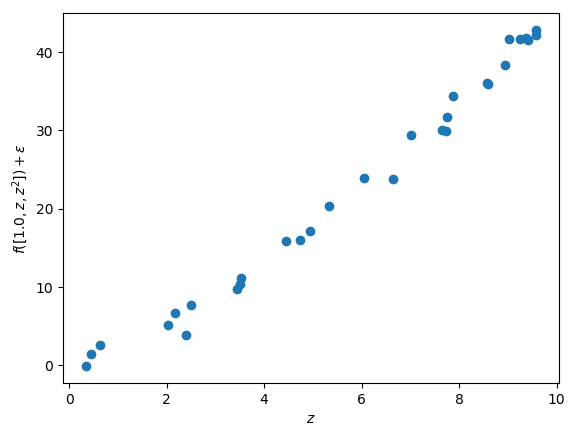

PyObject Text(29.88125000000001, 0.5, '$f([1.0, z, z^2]) + \\epsilon$')

In [5]:
using PyPlot, ForneyLab, LinearAlgebra

# Parameters
Σ = 1e5 * Diagonal(I,3) # Covariance matrix of prior on w
σ2 = 2.0         # Noise variance

# Generate data set
w = [1.0; 2.0; 0.25]
N = 30
z = 10.0*rand(N)
x_train = [[1.0; z; z^2] for z in z] # Feature vector x = [1.0; z; z^2]
f(x) = (w'*x)[1]
y_train = map(f, x_train) + sqrt(σ2)*randn(N) # y[i] = w' * x[i] + ϵ
scatter(z, y_train); xlabel(L"z"); ylabel(L"f([1.0, z, z^2]) + \epsilon")

#### CODE EXAMPLE

Perform sum-product message passing and plot result (mean of posterior)

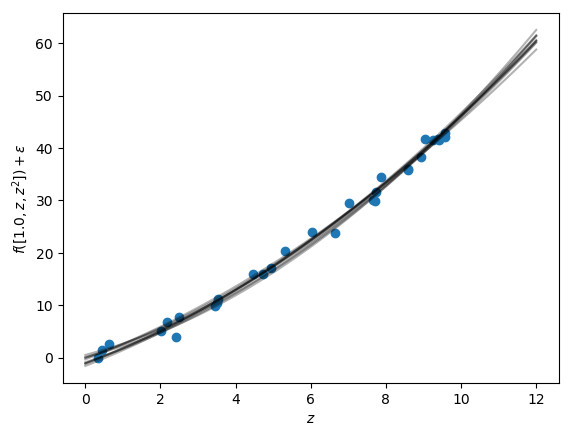

Posterior distribution of w: 𝒩(xi=[3.46e+02, 2.65e+03, 2.18e+04], w=[[15.00, 86.72, 6.39e+02][86.72, 6.39e+02, 5.14e+03][6.39e+02, 5.14e+03, 4.33e+04]])



In [6]:
# Build factorgraph

fg = FactorGraph()
@RV w ~ GaussianMeanVariance(constant(zeros(3)), constant(Σ, id=:Σ), id=:w) # p(w)
for t=1:N
    x_t = Variable(id=:x_*t)
    d_t = Variable(id=:d_*t) # d=w'*x
    DotProduct(d_t, x_t, w) # p(f|w,x)
    @RV y_t ~ GaussianMeanVariance(d_t, constant(σ2, id=:σ2_*t), id=:y_*t) # p(y|d)
    placeholder(x_t, :x, index=t, dims=(3,))
    placeholder(y_t, :y, index=t);
end

# Build and run message passing algorithm
eval(Meta.parse(sumProductAlgorithm(w)))
data = Dict(:x => x_train, :y => y_train)
w_posterior_dist = step!(data)[:w]

# Plot result
println("Posterior distribution of w: $(w_posterior_dist)")
scatter(z, y_train); xlabel(L"z"); ylabel(L"f([1.0, z, z^2]) + \epsilon");
z_test = collect(0:0.2:12)
x_test = [[1.0; z; z^2] for z in z_test]
for sample=1:10
    w = ForneyLab.sample(w_posterior_dist)
    f_est(x) = (w'*x)[1]
    plot(z_test, map(f_est, x_test), "k-", alpha=0.3);
end

### <span class="exercise">Homework Exercises </span>

- (Ex.1) Reflect on the fact that we now have methods for both marginalization and processing observations in FFGs. In principle, we are sufficiently equipped to do inference in probabilistic models through message passing. Draw the graph for $$p(x_1,x_2,x_3)=f_a(x_1)\cdot f_b(x_1,x_2)\cdot f_c(x_2,x_3)$$ and show which boxes need to be closed for computing $p(x_1|x_2)$.

- (Ex.2) Consider a variable $X$ with measurements $D=\{x_1,x_2\}$. We assume the following model for $X$:
$$\begin{align*}
p(D,\theta) &= p(\theta)\cdot \prod_{n=1}^2 p(x_n|\theta)  \\
p(\theta) &= \mathcal{N}(\theta \mid 0,1) \\
p(x_n \mid\theta) &= \mathcal{N}(x_n \mid \theta,1)
\end{align*}$$
  - Draw the factor graph and infer $\theta$ through the Sum-Product Algorithm. 

### Inference in Linear Gaussian Models by Sum-Product Message Passing

- The foregoing message update rules can be extended to all scenarios involving additions, fixed-gain multiplications and branching (equality nodes), thus creating a completely **automatable inference framework** for factorized linear Gaussian models.

- The update rules for elementary and important node types can be put in a Table (see **Tables 1 through 6** in [Loeliger, 2007](./files/Loeliger-2007-The-factor-graph-approach-to-model-based-signal-processing.pdf)).

- If the update rules for all node types in a graph have been tabulated, then inference by message passing comes down to a set of table-lookup operations. This also works for large graphs (where 'manual' inference becomes intractable).

- If the graph contains no cycles, the Sum-Product Algorithm computes **exact** marginals for all hidden variables.

- If the graph contains cycles, we have in principle an infinite tree without terminals. In this case, the SP Algorithm is not guaranteed to find exact marginals. In practice, if we apply the SP algorithm for just a few iterations we often find satisfying approximate marginals.   

In [7]:
open("../../styles/aipstyle.html") do f display("text/html", read(f, String)) end


<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->